In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os


In [34]:
os.environ["OMP_NUM_THREADS"] = "1"


In [35]:

data = pd.read_csv(r'E:\prodigy\task 2\Mall_Customers.csv')

data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
data['Genre'] = data['Genre'].replace({'Male': 0, 'Female': 1})
data = data.drop('CustomerID', axis=1)

print(data.head())


   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0      0   19                  15                      39
1      0   21                  15                      81
2      1   20                  16                       6
3      1   23                  16                      77
4      1   31                  17                      40


In [37]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print(scaled_data[:5])  


[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]


C:\Users\eswar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eswar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eswar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\eswar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

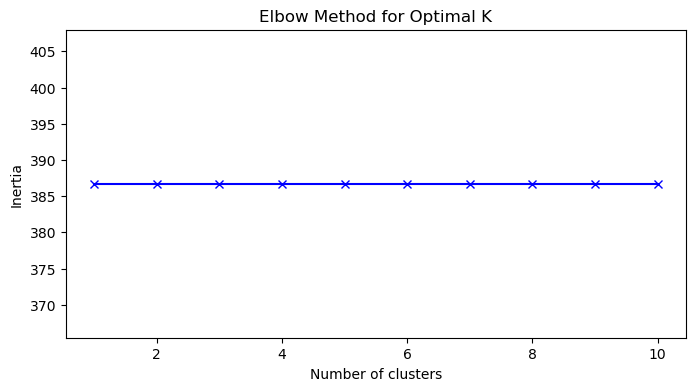

In [38]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

clusters = kmeans.labels_

data['Cluster'] = clusters
print(data.head())


C:\Users\eswar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eswar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   Genre  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0      0   19                  15                      39        3
1      0   21                  15                      81        3
2      1   20                  16                       6        2
3      1   23                  16                      77        1
4      1   31                  17                      40        1


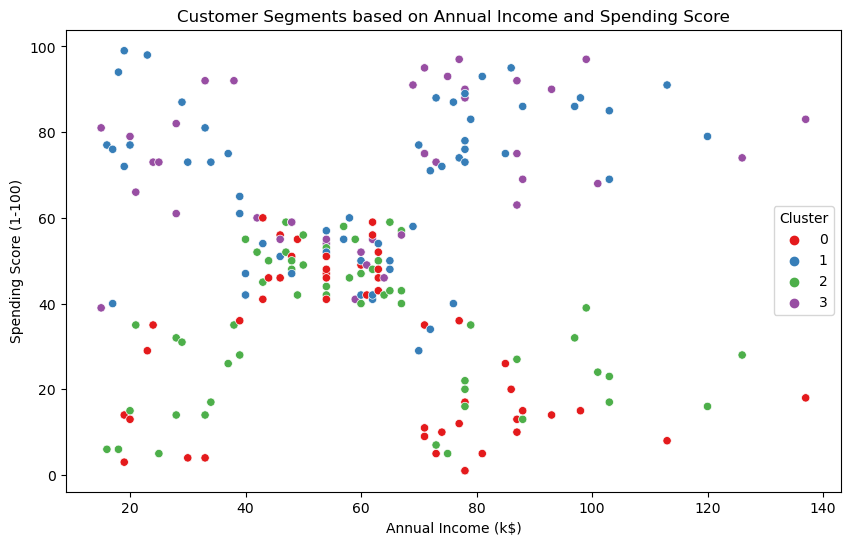

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.show()


In [41]:
cluster_analysis = data.groupby('Cluster').mean()
print(cluster_analysis)


         Genre        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                              
0          0.0  49.437500           62.416667               29.208333
1          1.0  28.438596           59.666667               67.684211
2          1.0  48.109091           58.818182               34.781818
3          0.0  28.250000           62.000000               71.675000
